In [2]:
# cd \课件\第三章素材\294_公共自行车租借预测

In [2]:
import pandas as pd
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

线性回归

In [ ]:
#构建线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(train_x, train_y)

#回归效果评估
pred_y_test = lr.predict(test_x)
pred_y_train = lr.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

岭回归

In [3]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np
import math

lambdaList=np.arange(math.exp(0),math.exp(10) , 10)
coef = pd.DataFrame() #creates a new dataframe that's empty

for lambda_ in lambdaList: 

    # alpha=1.0
    index = lambda_ 
    columns = train_x.columns

    clf = Ridge(alpha = lambda_)#=1.0
    clf.fit(train_x, train_y)

    df = pd.DataFrame(clf.coef_,columns=columns)
    df['lambda']=math.log(index)


    coef = coef.append(df, ignore_index = True) # ignoring index is optional
# try printing some data from newDF
print(coef.head()) #again optional

       season           yr       mnth     holiday    weekday  workingday  \
0  555.434304  2013.982317 -50.713528 -599.420729  82.408109   69.824310   
1  634.793311  1906.081791 -53.435701 -356.317366  90.331245   96.438143   
2  659.678684  1791.864480 -49.815759 -254.770861  93.373762  101.587457   
3  664.130699  1687.343092 -44.282279 -199.119687  95.127270  100.884509   
4  658.789395  1593.021879 -38.108671 -163.882402  96.259858   98.028228   

   weathersit         temp        atemp         hum    windspeed    lambda  
0 -636.341915  2610.593104  2687.950546 -840.874463 -2087.820986  0.000000  
1 -763.973972  2059.836768  1878.506060 -162.055216  -618.568027  2.397895  
2 -762.943540  1661.766050  1502.140066  -92.651226  -388.518186  3.044522  
3 -745.425766  1396.657988  1258.253413  -76.284943  -289.475362  3.433987  
4 -723.209702  1207.481748  1085.870240  -71.580028  -232.955387  3.713572  


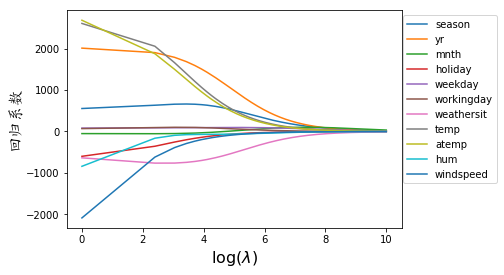

In [5]:
import matplotlib.pyplot as plt
import matplotlib

zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
# multiple line plot
plt.plot( 'lambda', 'season', data=coef)#, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'lambda', 'yr', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'mnth', data=coef)#, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.plot( 'lambda', 'holiday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'weekday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'workingday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'weathersit', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'temp', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'atemp', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'hum', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'windspeed', data=coef)#, marker='', color='olive', linewidth=2)

plt.legend( bbox_to_anchor=(1.3, 1),loc='upper right')

plt.xlabel(r'log($\lambda$)', fontsize=16)
plt.ylabel(r'回归系数',fontproperties=zhfont1, fontsize=16)

plt.savefig('Ridge.jpg', bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics
clf = Ridge(alpha=1.0)
clf.fit(train_x, train_y)

#回归效果评估
pred_y_test = clf.predict(test_x)
pred_y_train = clf.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

Lasso回归

In [ ]:
from sklearn import linear_model
from sklearn import metrics
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_x, train_y)

print(clf.coef_)

#Lasso回归效果评估
pred_y_test = clf.predict(test_x)
pred_y_train = clf.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

In [6]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
import math

lambdaList=np.arange(math.exp(-8),math.exp(8) , 10)
coef = pd.DataFrame() #creates a new dataframe that's empty

for lambda_ in lambdaList: 

    index = lambda_ 
    columns = train_x.columns

    clf = Lasso(alpha = lambda_)#=1.0
    clf.fit(train_x, train_y)

    df = pd.DataFrame([clf.coef_],columns=columns)
    df['lambda']=math.log(index)

    coef = coef.append(df, ignore_index = True) # ignoring index is optional
# try printing some data from newDF
print(coef.head()) #again optional

       season           yr       mnth     holiday    weekday  workingday  \
0  537.615535  2016.845914 -49.303147 -633.033100  80.845429   64.261305   
1  551.296949  2010.967888 -46.916578 -286.278525  87.184915   55.592516   
2  552.193544  1975.336180 -37.990370   -0.000000  86.700625   37.039717   
3  543.657953  1941.207266 -31.109530   -0.000000  85.425050    0.000000   
4  534.066087  1907.193730 -24.151714   -0.000000  84.045814    0.000000   

   weathersit         temp        atemp          hum    windspeed    lambda  
0 -562.081042  1746.535921  3878.089532 -1233.535088 -2846.567478 -8.000000  
1 -760.598215  2787.423370  2299.483534    -0.000000  -804.183756  2.302619  
2 -745.347025  4021.943555   612.680662    -0.000000    -0.000000  2.995749  
3 -725.557366  4273.710612     0.000000    -0.000000    -0.000000  3.401209  
4 -706.579658  3986.221676     0.000000    -0.000000    -0.000000  3.688888  


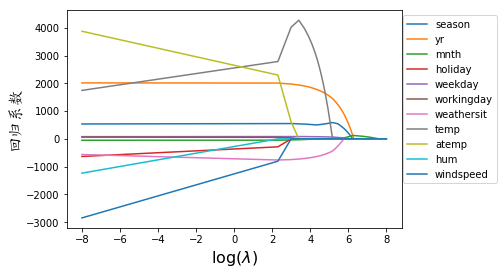

In [7]:
import matplotlib.pyplot as plt
import matplotlib

zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')

# multiple line plot
plt.plot( 'lambda', 'season', data=coef)#, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'lambda', 'yr', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'mnth', data=coef)#, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.plot( 'lambda', 'holiday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'weekday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'workingday', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'weathersit', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'temp', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'atemp', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'hum', data=coef)#, marker='', color='olive', linewidth=2)
plt.plot( 'lambda', 'windspeed', data=coef)#, marker='', color='olive', linewidth=2)
plt.legend( bbox_to_anchor=(1.3, 1),loc='upper right')
# plt.title('Lasso', fontsize=20)
plt.xlabel(r'log($\lambda$)', fontsize=16)
plt.ylabel(r'回归系数',fontproperties=zhfont1, fontsize=16)

plt.savefig('Lasso.jpg', bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn import metrics
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_x, train_y)

#Lasso回归效果评估
pred_y_test = clf.predict(test_x)
pred_y_train = clf.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

RANSAC

In [ ]:
from sklearn import linear_model
from sklearn import metrics
ransac = linear_model.RANSACRegressor()
ransac.fit(train_x, train_y)

#回归效果评估
pred_y_test = ransac.predict(test_x)
pred_y_train = ransac.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

TheilSenRegressor

In [ ]:
from sklearn.linear_model import TheilSenRegressor
theil_sen = TheilSenRegressor()
theil_sen.fit(train_x, train_y)

#回归效果评估
pred_y_test = theil_sen.predict(test_x)
pred_y_train = theil_sen.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

HuberRegressor

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn import metrics
huberRegressor = HuberRegressor()
huberRegressor.fit(train_x, train_y)

#回归效果评估
pred_y_test = huberRegressor.predict(test_x)
pred_y_train = huberRegressor.predict(train_x)

print("训练集R^2: ", metrics.r2_score(train_y, pred_y_train))
print("测试集R^2: ", metrics.r2_score(test_y, pred_y_test))

In [ ]:
import pandas as pd
df=pd.read_csv("car.csv")
print(df)
df = pd.get_dummies(df, columns=['Brand'],drop_first=True)
df